In [1]:
# Basic libraries
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

from sklearn.model_selection import train_test_split
import sklearn
import scipy

from pylab import rcParams
rcParams['figure.figsize'] = 15,12
LABELS = ['Normal', 'Fraud']

In [2]:
# import the dataset
data = pd.read_csv('CreditCard.csv', sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# as you can see that the features name is not given clearly, which means the dataset contains confidential information .. 
# it means working, removing, and new creation of features is little risky here..

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
# As you can see above there are imbalance data distribution in case of dependable features..
284315+492

284807

In [7]:
492/284807

0.001727485630620034

In [8]:
# !pip install pandas-profiling

In [9]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(data)
# prof.to_file(output_file = 'output.html')

In [10]:
# Now this pandas profiling library will give us a better glance about the distribution of the dataset. 
# as well as it will also give us some clue to work on preprocessing..

from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file = 'output.html')

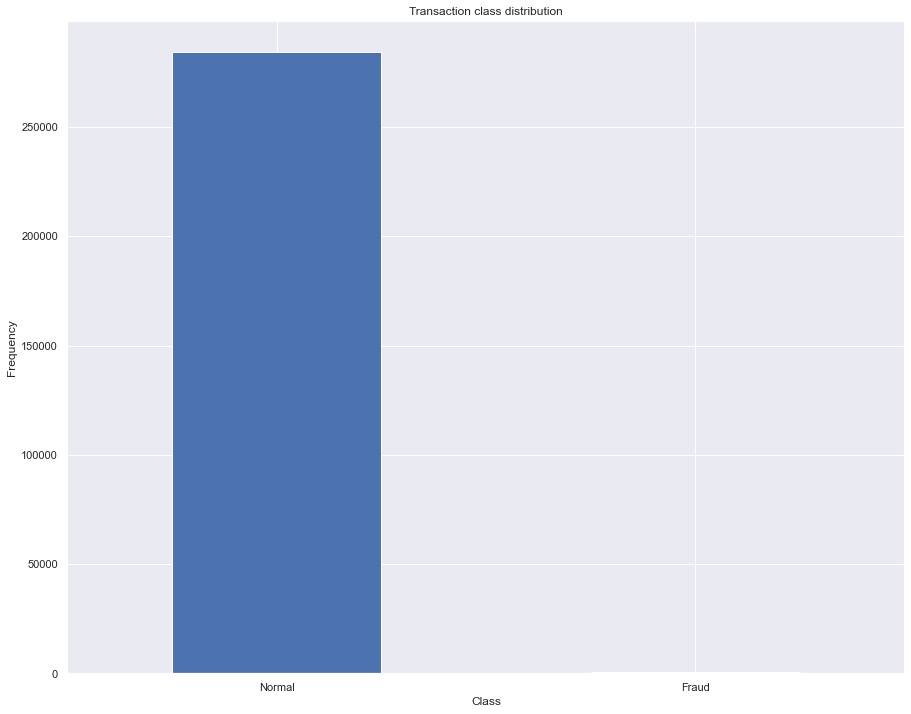

In [11]:
# In below output graph, you can see that how many fraud happend in this dataset in the given timeframe..
count_classes = pd.value_counts(data['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel('Class')
plt.ylabel("Frequency")
plt.show()

In [12]:
# Naming the features as fraud and normal..
fraud = data[data['Class']==1]
normal = data[data['Class']==0]
print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


In [13]:
492/(492+284315)

0.001727485630620034

In [14]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
25691*81

2080971

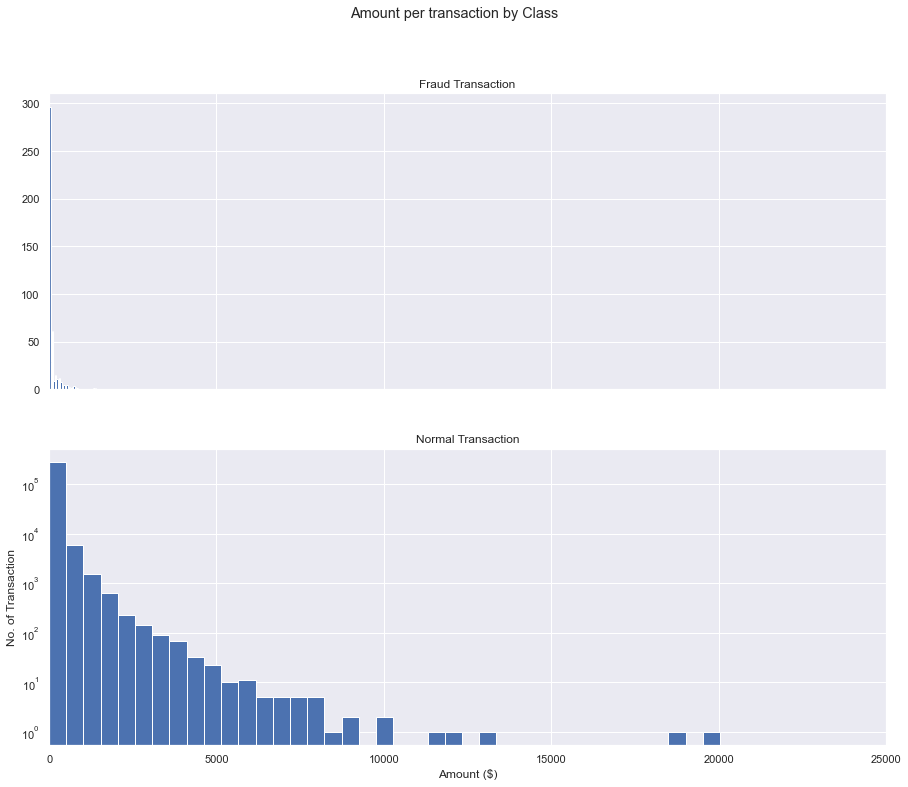

In [17]:
# With calculation of fraud and normal transaction we will see in scatter plot more clearance..
f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
f.suptitle("Amount per transaction by Class")
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud Transaction')

ax2.hist(normal.Amount, bins=bins)
ax2.set_title('Normal Transaction')

plt.xlabel("Amount ($)")
plt.ylabel("No. of Transaction")

plt.xlim(0,25000)
plt.yscale('log')
plt.show()

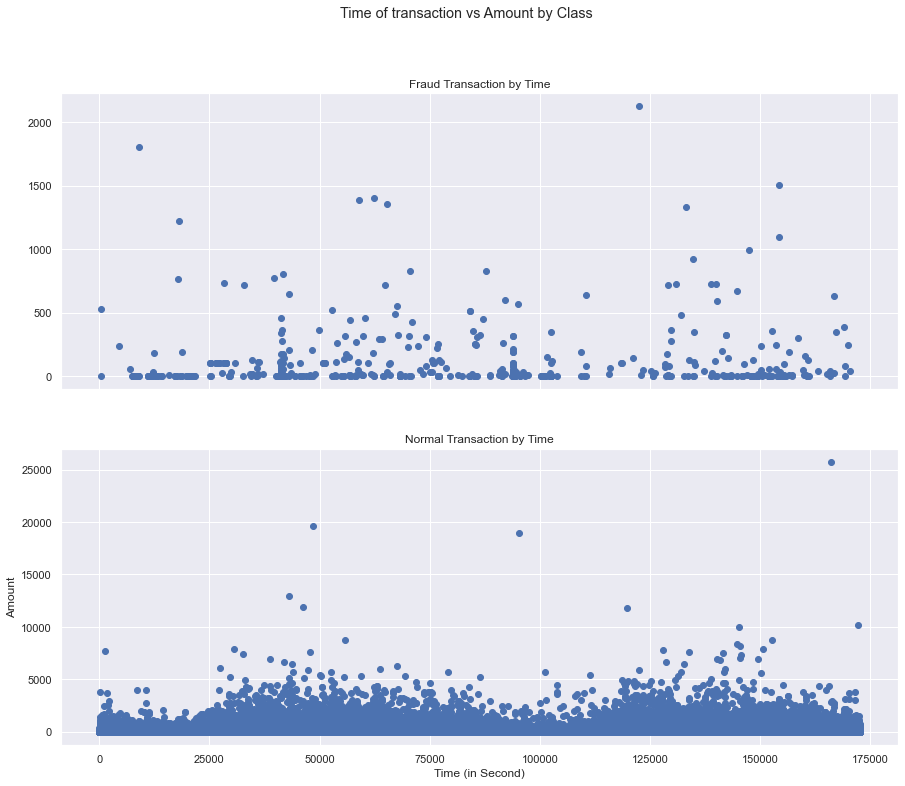

In [18]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
f.suptitle("Time of transaction vs Amount by Class")

ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud Transaction by Time')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal Transaction by Time')

plt.xlabel("Time (in Second)")
plt.ylabel("Amount")

plt.show()

In [19]:
data.shape

(284807, 31)

In [20]:
# we are taking 10% data only for building a model
# Please try to replicate the same with all data - Task

In [21]:
data1 = data.sample(frac=0.2, random_state=1000)
data1.shape

(56961, 31)

In [22]:
fraud = data1[data1['Class']==1]
valid = data1[data1['Class']==0]

print(fraud.shape)
print(valid.shape)

(106, 31)
(56855, 31)


In [23]:
outlier_fraction = 106/(106+56858)

In [24]:
outlier_fraction

0.0018608243803103714

In [25]:
data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
198800,132658.0,2.056433,-0.316915,-2.789687,-0.775164,2.497163,3.164444,-0.396550,0.715194,0.448127,...,0.243647,0.743975,0.037861,0.737525,0.302948,-0.087858,-0.001144,-0.064954,3.80,0
95536,65359.0,-0.476480,0.967301,1.660071,0.000008,-0.106866,-0.624360,0.599600,0.085344,-0.329163,...,-0.186026,-0.470205,0.055860,0.364065,-0.331242,0.082720,0.278155,0.119504,3.57,0
180242,124448.0,1.943666,-1.029557,-1.276665,-0.427737,-0.815657,-1.007531,-0.293930,-0.238641,-0.743251,...,-0.027971,0.203359,0.049295,0.092062,-0.178437,0.762153,-0.089487,-0.057625,107.77,0
278892,168508.0,-0.343991,1.475547,0.349266,1.211181,-0.510325,-1.281538,0.455647,0.011873,-0.737317,...,0.463618,1.563284,-0.107122,1.032006,-0.465200,0.211401,0.238458,0.208167,7.84,0
85098,60601.0,1.185368,0.248102,1.110961,2.448941,-0.387718,0.503952,-0.546283,0.203680,0.070122,...,-0.102446,-0.226039,-0.052715,-0.481575,0.368006,0.004532,0.033685,0.027790,4.72,0


In [26]:
columns = data1.iloc[:,1:-1]
target = data1.iloc[:,-1]

In [27]:
columns.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
198800,2.056433,-0.316915,-2.789687,-0.775164,2.497163,3.164444,-0.396550,0.715194,0.448127,0.031925,...,-0.165740,0.243647,0.743975,0.037861,0.737525,0.302948,-0.087858,-0.001144,-0.064954,3.80
95536,-0.476480,0.967301,1.660071,0.000008,-0.106866,-0.624360,0.599600,0.085344,-0.329163,-0.339743,...,0.015199,-0.186026,-0.470205,0.055860,0.364065,-0.331242,0.082720,0.278155,0.119504,3.57
180242,1.943666,-1.029557,-1.276665,-0.427737,-0.815657,-1.007531,-0.293930,-0.238641,-0.743251,1.125115,...,-0.449719,-0.027971,0.203359,0.049295,0.092062,-0.178437,0.762153,-0.089487,-0.057625,107.77
278892,-0.343991,1.475547,0.349266,1.211181,-0.510325,-1.281538,0.455647,0.011873,-0.737317,0.100004,...,0.248074,0.463618,1.563284,-0.107122,1.032006,-0.465200,0.211401,0.238458,0.208167,7.84
85098,1.185368,0.248102,1.110961,2.448941,-0.387718,0.503952,-0.546283,0.203680,0.070122,0.556493,...,-0.141848,-0.102446,-0.226039,-0.052715,-0.481575,0.368006,0.004532,0.033685,0.027790,4.72


In [28]:
target.head()

198800    0
95536     0
180242    0
278892    0
85098     0
Name: Class, dtype: int64

# split the data into training and test

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(columns, target, 
                                                    train_size=0.75,random_state=125,
                                                   stratify=target)


# Using Machine Learning model

In [30]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

In [31]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [33]:
print("Confusion Matrix - Training :", confusion_matrix(y_train, y_pred_train))
print("*****************************"*5)
print("Confusion Matrix - Test :", confusion_matrix(y_test, y_pred_test))

Confusion Matrix - Training : [[42634     7]
 [   31    48]]
*************************************************************************************************************************************************
Confusion Matrix - Test : [[14212     2]
 [    9    18]]


In [34]:
print(classification_report(y_train, y_pred_train))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42641
           1       0.87      0.61      0.72        79

    accuracy                           1.00     42720
   macro avg       0.94      0.80      0.86     42720
weighted avg       1.00      1.00      1.00     42720

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14214
           1       0.90      0.67      0.77        27

    accuracy                           1.00     14241
   macro avg       0.95      0.83      0.88     14241
weighted avg       1.00      1.00      1.00     14241



In [35]:
print("Accuracy - Training :", accuracy_score(y_train, y_pred_train))
print("*****************************"*5)
print("Accuracy - Test :", accuracy_score(y_test, y_pred_test))

Accuracy - Training : 0.9991104868913858
*************************************************************************************************************************************************
Accuracy - Test : 0.9992275823327014


In [36]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [37]:
y_pred_train_dt = dtree.predict(x_train)
y_pred_test_dt = dtree.predict(x_test)

In [38]:
print(classification_report(y_train, y_pred_train_dt))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42641
           1       1.00      1.00      1.00        79

    accuracy                           1.00     42720
   macro avg       1.00      1.00      1.00     42720
weighted avg       1.00      1.00      1.00     42720

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14214
           1       0.74      0.85      0.79        27

    accuracy                           1.00     14241
   macro avg       0.87      0.93      0.90     14241
weighted avg       1.00      1.00      1.00     14241



# Ensemble Learning - Bagging

In [39]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier()
bgcl.fit(x_train, y_train)

BaggingClassifier()

In [40]:
y_pred_train_bg = bgcl.predict(x_train)
y_pred_test_bg = bgcl.predict(x_test)

In [41]:
print(classification_report(y_train, y_pred_train_bg))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_bg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42641
           1       1.00      0.94      0.97        79

    accuracy                           1.00     42720
   macro avg       1.00      0.97      0.98     42720
weighted avg       1.00      1.00      1.00     42720

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14214
           1       0.79      0.85      0.82        27

    accuracy                           1.00     14241
   macro avg       0.90      0.93      0.91     14241
weighted avg       1.00      1.00      1.00     14241



In [42]:
print("Accuracy - Training :", accuracy_score(y_train, y_pred_train_bg))
print("*****************************"*5)
print("Accuracy - Test :", accuracy_score(y_test, y_pred_test_bg))

Accuracy - Training : 0.9998829588014981
*************************************************************************************************************************************************
Accuracy - Test : 0.9992978021206376


# Ensemble Learning - AdaBoosting method

In [43]:
from sklearn.ensemble import AdaBoostClassifier
adbcl = AdaBoostClassifier(random_state=1)
adbcl.fit(x_train, y_train)

AdaBoostClassifier(random_state=1)

In [44]:
y_pred_train_adb = adbcl.predict(x_train)
y_pred_test_adb = adbcl.predict(x_test)

In [45]:
print(classification_report(y_train, y_pred_train_adb))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_adb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42641
           1       0.93      0.81      0.86        79

    accuracy                           1.00     42720
   macro avg       0.96      0.91      0.93     42720
weighted avg       1.00      1.00      1.00     42720

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14214
           1       0.88      0.81      0.85        27

    accuracy                           1.00     14241
   macro avg       0.94      0.91      0.92     14241
weighted avg       1.00      1.00      1.00     14241



# Gradient Boosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=50, random_state=1)
gbcl.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=1)

In [47]:
y_pred_train_gd = gbcl.predict(x_train)
y_pred_test_gd = gbcl.predict(x_test)

In [48]:
print(classification_report(y_train, y_pred_train_gd))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_gd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42641
           1       0.97      0.87      0.92        79

    accuracy                           1.00     42720
   macro avg       0.99      0.94      0.96     42720
weighted avg       1.00      1.00      1.00     42720

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14214
           1       0.83      0.70      0.76        27

    accuracy                           1.00     14241
   macro avg       0.91      0.85      0.88     14241
weighted avg       1.00      1.00      1.00     14241



# XGBoost

In [49]:
from xgboost import XGBClassifier
xgbcl = XGBClassifier()
xgbcl.fit(x_train, y_train)

[13:15:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
y_pred_train_xgb = xgbcl.predict(x_train)
y_pred_test_xgb = xgbcl.predict(x_test)

In [51]:
print(classification_report(y_train, y_pred_train_xgb))
print("*****************************"*5)
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42641
           1       1.00      1.00      1.00        79

    accuracy                           1.00     42720
   macro avg       1.00      1.00      1.00     42720
weighted avg       1.00      1.00      1.00     42720

*************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14214
           1       0.96      0.85      0.90        27

    accuracy                           1.00     14241
   macro avg       0.98      0.93      0.95     14241
weighted avg       1.00      1.00      1.00     14241



# IsolationForest, LocalOutlierFactor, OneClassSVM

In [52]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [53]:
# here we are classifying the models and its parameters which we have derived before..
Classification = {"Isolation Forest" : IsolationForest(max_samples=len(columns),
                                                     contamination=outlier_fraction),
                 
                 "Local Outlier Factor" : LocalOutlierFactor(contamination=outlier_fraction),
                 
                 "One Class SVM" : OneClassSVM()}

# max_samples=len(column)..  this is because we have targeted the target variable with variable name (column)...

In [54]:
# here we calling the models and giving the dataset attributes..
n_outlier = len(fraud)

for i, (clf_name, clf) in enumerate(Classification.items()):       # calling the model from dictionary by using items keywords..
    if clf_name =='Local Outlier Factor' :
        y_pred = clf.fit_predict(columns)
        score_prediction = clf.negative_outlier_factor_
        
    elif clf_name =='One Class SVM' :
        clf.fit(columns)
        y_pred = clf.predict(columns)
        
    else:
        clf.fit(columns)
        score_prediction = clf.decision_function(columns)
        y_pred = clf.predict(columns)
        
    y_pred[y_pred==1] = 0
    y_pred[y_pred==-1] = 1
    n_error = (y_pred !=target).sum()
    
    print("{} : {}".format(clf_name, n_error))
    print("Accuracy Score :")
    
    print(accuracy_score(target, y_pred))
    print("Classification Report :")
    print(classification_report(target, y_pred))

Isolation Forest : 146
Accuracy Score :
0.9974368427520585
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56855
           1       0.31      0.31      0.31       106

    accuracy                           1.00     56961
   macro avg       0.66      0.66      0.66     56961
weighted avg       1.00      1.00      1.00     56961

Local Outlier Factor : 170
Accuracy Score :
0.9970155018345885
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56855
           1       0.20      0.20      0.20       106

    accuracy                           1.00     56961
   macro avg       0.60      0.60      0.60     56961
weighted avg       1.00      1.00      1.00     56961

One Class SVM : 28403
Accuracy Score :
0.5013605800459964
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.50      